In [44]:
%pylab inline

import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
for family in ['Adamenko', 'Pestova']: # ваша фамилия на латинице
    family_seed = sum([ord(i) for i in family])
    
    np.random.seed(family_seed)

    print(np.random.randint(0, 100) % 2 + 1)

Populating the interactive namespace from numpy and matplotlib
2
2


In [2]:
import os
import sys

import pandas as pd
import numpy as np

import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
import statsmodels.stats as sms
from arch import arch_model

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

/usr/local/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### Задание 1

    (3 балла) Процесс X = (Xn)n=1, 2, ...,  наблюдаемый в режиме реального времени, 
    задается нормально распределенным белым шумом (с нулевым средним и единичной дисперсией), т. е.
    Xn =εn, n=1,2,...
    В неизвестный момент времени θ   1 происходит разладка (из- менение статистических свойств) 
    процесса Xn, которая состоит в том, что для n   θ процесс X задается уравнением типа ARCH(1), то есть
    Xn = σnεn, σ2 = α0 + α1X2 , n   θ, n n−1
    где |α1| < 1.
    Построить процедуру обнаружения разладки, основанную на ста- тистике Ширяева-Робертса, 
    для обнаружения момента θ. Парамет- ры α0,α1 процесса считать известными. 
    Привести формулы для отношения правдоподобия, а также для одного шага итеративного 
    алгоритма Ширяева-Робертса. В какой момент следует поднимать тревогу об обнаружении разладки?

Процесс 
$$ X_{n} = \begin{cases} {\epsilon}_{n}, & 0 \leq n <  \theta \\ {\sigma}_{n}{\epsilon}_{n}, & n \geq \theta \end{cases},  {\sigma}_{n}^{2} = {\alpha}_{0}+{\alpha}_{1}*X_{n-1}^{2}  $$




Плотность неразлаженного процесса
$$f_{\infty} = \frac{1}{(2\pi)^{\frac{n}{2}}}\exp{\frac{-\sum\limits_{i=1}^n X_{i}^2}{2}} $$

Плотность разлаженного процесса
$$f_{0} = f_{0}(X_{0})*f_{0}(X_{1}|X_{0})*..*f_{0}(X_{n}|X_{n-1}) = $$

$$ = f_{0}(X_{1})*..*f_{0}(X_{n}) =  \frac{1}{(2\pi)^{\frac{n}{2}}\prod_{i=1}^{n}\sigma_{i}}\exp{\frac{-\sum\limits_{i=1}^n \frac{X_{i}^2}{\sigma_{i}^2}}{2}} $$


$l_n$ Основная статистика(отношение правдоподобия)

$$  l_{n} = \frac{f_{0}(X_{0}, X_{1}, .., X_{n})}{f_{\infty}(X_{0}, X_{1}, .., X_{n})} = $$
$$ =\frac{1}{(2\pi)^{\frac{n}{2}}\prod_{i=1}^{n}\sigma_{i}}\exp{\frac{-\sum\limits_{i=1}^n X_{i}^2(\frac{1}{\sigma_{i}^2}-1)}{2}} $$

$f_\theta$

$$f_{\theta} = \frac{1}{(2\pi)^{\frac{n}{2}}\prod_{i=\theta}^{n}\sigma_{i}}\exp{\frac{-\sum\limits_{i=0}^{\theta-1} X_{i}^2}{2}}*exp{\frac{-\sum\limits_{i=\theta}^n \frac{X_{i}^2}{\sigma_{i}^2}}{2}}$$


Статистика Ширяева-Робертса 

$$ R_n = \sum\limits_{\theta = 1}^{n} \frac{f_{\theta}(X_1, \ldots, X_n)}{f_{\infty}(X_1, \ldots, X_n)} = $$
$$ ...=\frac{1}{\prod_{i=\theta}^{n}\sigma_{i}} exp(-\frac{1}{2}(\sum\limits_{i=0}^{\theta-1} X_{i}^2+\sum\limits_{i=\theta}^n \frac{X_{i}^2}{\sigma_{i}^2})) $$


Cчитаем $R_n$, если оно больше B - выдаем allert

Один шаг итеративного алгоритма:
    $$R_0 = l_0$$
    $$...$$
    $$R_n = (1 + R_{n-1}) l_k$$

### Задание 2    
    Провести моделирование для определения оперативных характе- ристик процедуры обнаружения разладки, разработанной в зада- че 5. Считать заданными параметры α0 = 0.146, α1 = 0.107.
    (a) (2 балла) При использовании статистики γ = (γn)n=1, 2, ... преж- де всего необходимо подобрать значение порога B = BT в за- висимости от значения параметра T так, чтобы τ(BT;{γn}) ∈ MT . Требуется подсчитать (с помощью метода Монте-Карло) и дать в виде графика значения величины
    TSR(B) = E∞τ(B;{γn}) 9
    для разных значений B (и малых и больших).
    (b) (2 балла) С помощью метода Монте-Карло подсчитать и дать
    в виде графика значения величины
    RSR(B) = E0τ(B;{γn}).
    для разных значений B (и малых и больших). Графики нари-
    совать для достаточно частых значений B.


In [21]:
def tsplot(y, lags=None, figsize=(15, 10), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        #mpl.rcParams['font.family'] = 'Ubuntu Mono'
        layout = (3, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        qq_ax = plt.subplot2grid(layout, (2, 0))
        pp_ax = plt.subplot2grid(layout, (2, 1))
        
        y.plot(ax=ts_ax)
        ts_ax.set_title('Time Series Analysis Plots')
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)
        sm.qqplot(y, line='s', ax=qq_ax)
        qq_ax.set_title('QQ Plot')        
        scs.probplot(y, sparams=(y.mean(), y.std()), plot=pp_ax)

        plt.tight_layout()
    return

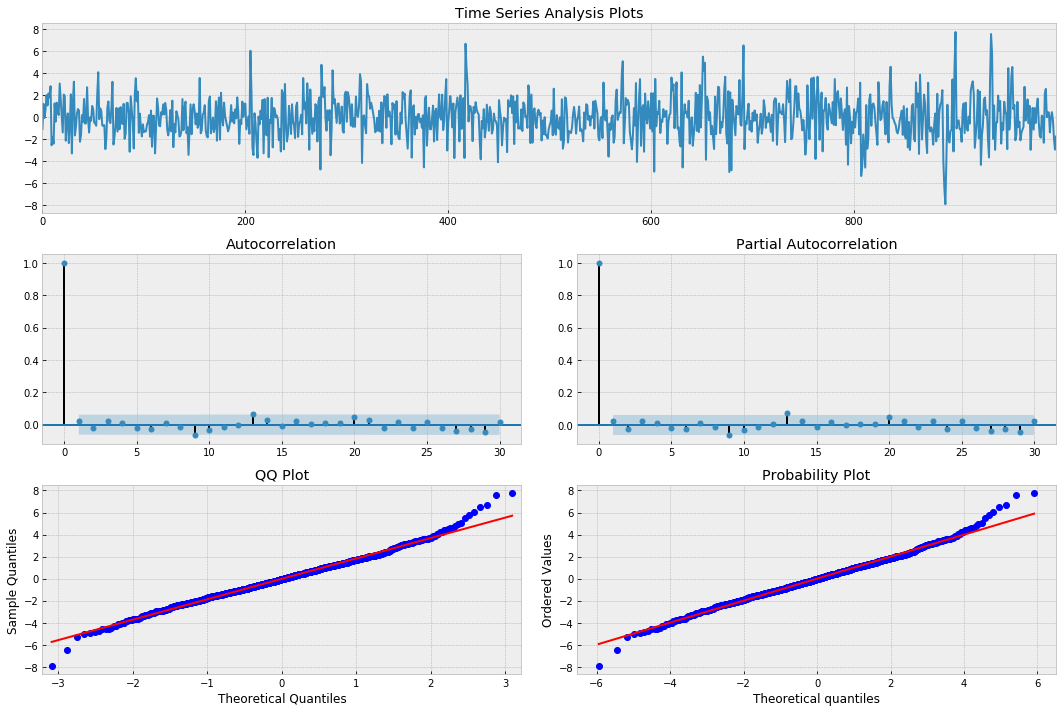

In [4]:
np.random.seed(13)

a0 = 2
a1 = .5

y = w = np.random.normal(size=1000)
Y = np.empty_like(y)

for t in range(len(y)):
    y[t] = w[t] * np.sqrt((a0 + a1*y[t - 1]**2))

tsplot(y, lags=30)

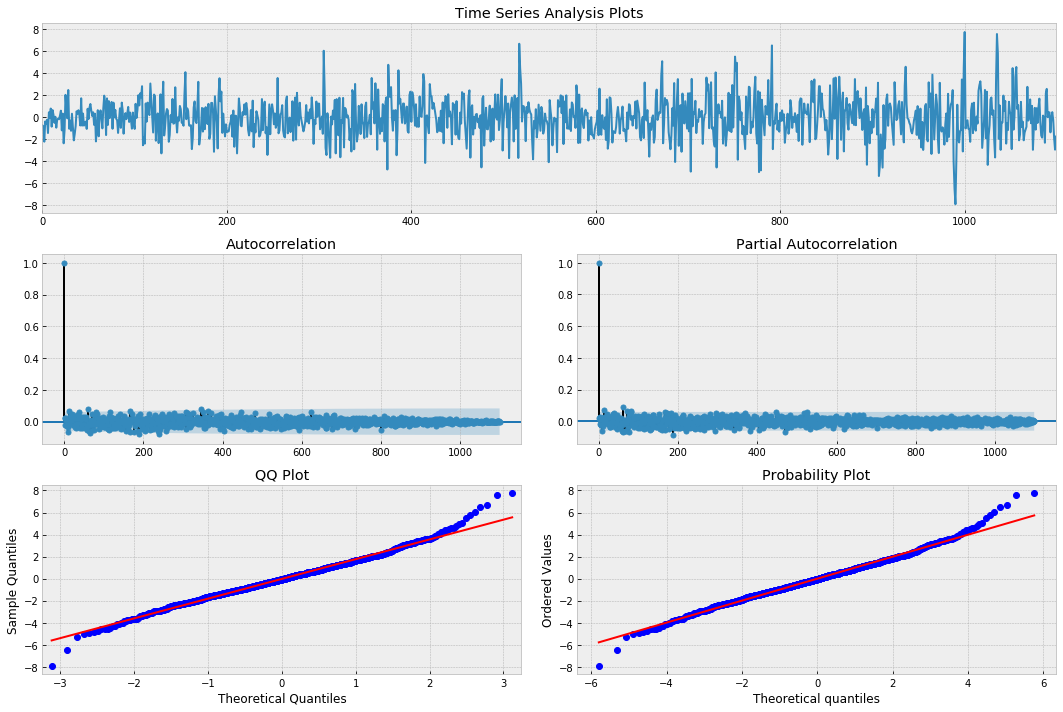

In [5]:
theta = 100
data = np.hstack((
    np.random.normal(loc=0, scale=1, size=theta),
    y)
)
tsplot(data)

In [6]:
am = arch_model(data)
res = am.fit()
print(res.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 2145.509634702207
Iteration:      2,   Func. Count:     15,   Neg. LLF: 2144.746156205174
Iteration:      3,   Func. Count:     22,   Neg. LLF: 2138.063635017153
Iteration:      4,   Func. Count:     30,   Neg. LLF: 2137.7823888210482
Iteration:      5,   Func. Count:     37,   Neg. LLF: 2135.975405310095
Iteration:      6,   Func. Count:     43,   Neg. LLF: 2133.408748899682
Iteration:      7,   Func. Count:     49,   Neg. LLF: 2133.3918648588938
Iteration:      8,   Func. Count:     55,   Neg. LLF: 2133.3747325809077
Iteration:      9,   Func. Count:     61,   Neg. LLF: 2133.373614952604
Iteration:     10,   Func. Count:     67,   Neg. LLF: 2133.373502865958
Iteration:     11,   Func. Count:     73,   Neg. LLF: 2133.3735012369534
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 2133.3735012369357
            Iterations: 11
            Function evaluations: 73
            Gradient evaluatio

Задание 2

In [7]:
class Stat(object):
    def __init__(self, threshold, direction="unknown", init_stat=0.0):
        self._direction = str(direction)
        self._threshold = float(threshold)
        self._stat = float(init_stat)
        self._alarm = self._stat / self._threshold
    
    @property
    def direction(self):
        return self._direction

    @property
    def stat(self):
        return self._stat
        
    @property
    def alarm(self):
        return self._alarm
        
    @property
    def threshold(self):
        return self._threshold
    
    def update(self, **kwargs):
        # Statistics may use any of the following kwargs:
        #   ts - timestamp for the value
        #   value - original value
        #   mean - current estimated mean
        #   std - current estimated std
        #   adjusted_value - usually (value - mean) / std
        # Statistics call this after updating '_stat'
        self._alarm = self._stat / self._threshold

class Cusum(Stat):
    def __init__(self, mean_0, mean_8, std,
                 threshold, direction="unknown", init_stat=0.0):
        self.mean_0 = mean_0
        self.mean_8 = mean_8
        self.std = std
        super(Cusum, self).__init__(threshold, direction, init_stat)
        
    def update(self, value):
        zeta_k = normal_likelihood(value, self.mean_0, self.mean_8,
                                  self.std)
        self._stat = max(0, self._stat + zeta_k)
        super(Cusum, self).update()

In [8]:
from scipy.stats import norm
def normal_likelihood(value, mean_0, mean_8, std):
    return np.log(norm.pdf(value, mean_0, std) / 
                  norm.pdf(value, mean_8, std))

In [9]:
def normal_likelihood_explicit(value, mean_0, mean_8, std):
    return (value - (mean_0 + mean_8) / 2.) * (mean_0 - mean_8) / std ** 2

In [43]:
mean_0 = 0.
std = 1.
a0=0.146 
a1=0.107

thresholds = np.arange(10., 100., 5.)
delays = []
delays_std = []
for h in thresholds:
    
    delays_for_h = []
    for i in range(1000):

        theta = 900
        y = w = np.random.normal(size=100)
        Y = np.empty_like(y)

        for t in range(len(y)):
            y[t] = w[t] * np.sqrt((a0 + a1*y[t - 1]**2))

        mean_8 = np.mean(y)
        X = np.hstack((
            np.random.normal(loc=mean_8, scale=std, size=theta),
            y)
        )
        for k, x_k in enumerate(X):
            cusum.update(x_k)
            if cusum._alarm >= 1 and k >= theta:
                break
        delays_for_h.append(k - theta)
    delays.append(np.mean(delays_for_h))
    delays_std.append(np.std(delays_for_h))

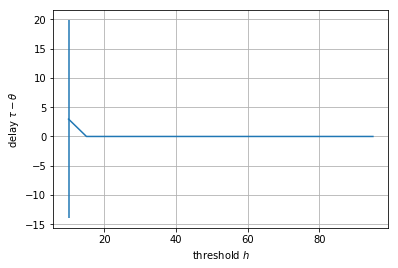

In [44]:
errorbar(thresholds, delays, yerr=delays_std)
xlabel('threshold $h$')
ylabel('delay $\\tau - \\theta$')
grid('on')

In [41]:
a0=0.146 
a1=0.107

mean_0 = 0.
std = 1.

delays = []
for i in range(100):
    
    theta = 900
    y = w = np.random.normal(size=100)
    Y = np.empty_like(y)

    for t in range(len(y)):
        y[t] = w[t] * np.sqrt((a0 + a1*y[t - 1]**2))
    
    mean_8 = np.mean(y)
    X = np.hstack((
        np.random.normal(loc=mean_8, scale=std, size=theta),
        y)
    )
    cusum = Cusum(mean_0, mean_8, std, 30.)
    for k, x_k in enumerate(X):
        cusum.update(x_k)
        if cusum._alarm >= 1 and k >= theta:
            break
    delays.append(k - theta)

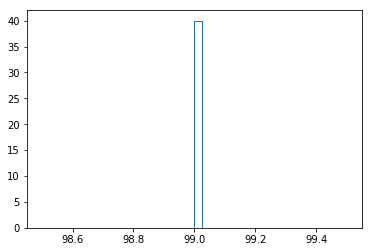

In [42]:
_ = hist(delays, bins=40, normed=1, histtype='step')

### Задание 3
    Вам выданы файлы sig2.train (обучающий) и sig2.test.public (валидационный) (третий файл sig2.test.private имеется у лек- тора). Обучающий файл содержит два столбца, причем первый столбец — это реализация X1, . . . , X1000 некоторого случайного про- цесса, полученная следующим образом:
    Xn∞, если n ∈/ [θ, θ + ∆], Xn =
    Xn0, еслиn∈[θ,θ+∆],
    а второй столбец — это индикатор действия процесса Xn0, т. .е. про-
    цесс
    
    Yn = 1[θ,θ+∆](n) = 0, если n ∈/ [θ, θ + ∆],
    1, еслиn∈[θ,θ+∆].
    Сечения процесса X могут быть как зависимы, так и независимы.
    (a) (1 балл) Предложите какие-либо модели временных рядов Xn0 и Xn∞, адекватно описывающие наблюдения обучающей вы- борки.
    (b) (1балл)Используяпредложенныемоделиирассмотренныена лекциях и семинарах подходы (полезно также рассматривать и их композиции), предложите алгоритм обнаружения раз- ладки процесса X. Этот алгоритм должен работать в режиме
    10
    реального времени, т.е. для вынесения решения о разладке в момент n он не может использовать всю доступную траек- торию процесса X, а может использовать лишь наблюдения до момента n включительно. (Тем не менее, для построения алгоритма можно использовать все доступные данные).
    (c) (1 балл) Реализуйте этот алгоритм в программном коде.
    (d) (1 балл) Проверьте его работу на обучающих данных, нарисуйте траекторию статистики этого алгоритма, сравните ее с индикатором разладки.
    (e) (1 балл) Нарисуйте траекторию статистики этого алгоритма на тестовых данных, вставьте в отчет рисунок. Сохраните эту траекторию в текстовый файл (по одному значению на стро- ку) и пришлите вместе с исходным кодом, реализующим ме- тод обнаружения разладки.

In [14]:
df_train = pd.read_table("sig2.train", header=None)
df_train.columns = ['X', 'y']
df_test = pd.read_table("sig2.test.public", header=None)
df_test.columns = ['X']#, 'y']

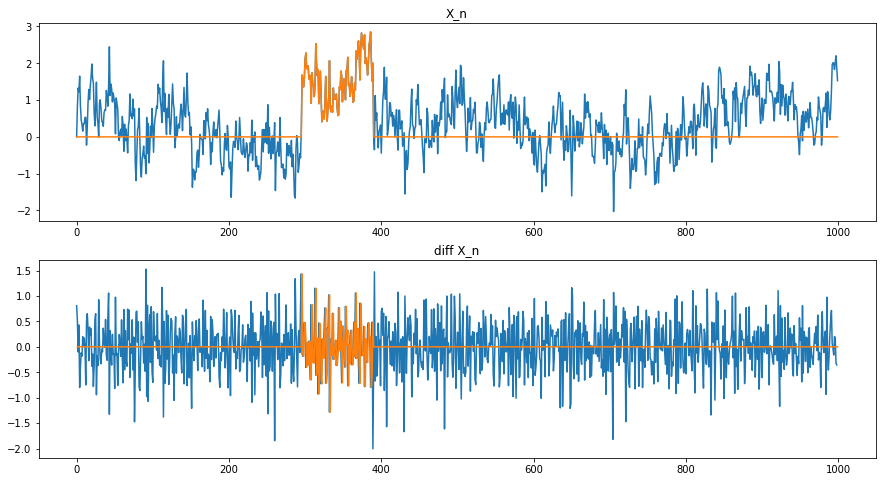

In [18]:
fig, ax = plt.subplots(2)
fig.set_size_inches(15,8)
ax[0].set_title('X_n')
ax[0].plot(df_train['X'])
ax[0].plot(df_train['X'] * df_train['y'])

ax[1].set_title('diff X_n')
ax[1].plot(np.diff(df_train['X']))
ax[1].plot(np.diff(df_train['X']) * df_train['y'][1:])
plt.show()

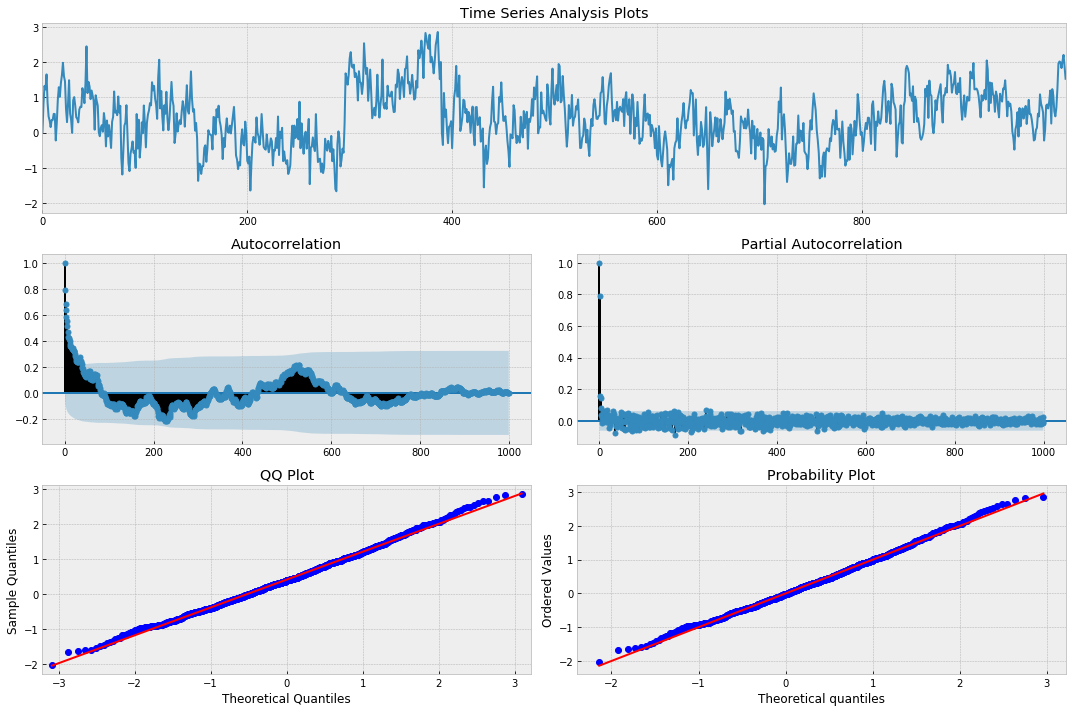

In [22]:
tsplot(df_train['X'])

In [37]:
interval2 = list(df_train[df_train['y']==1].index)
interval1 = list(df_train[df_train['y']==0].index)[:min(interval2)]
interval3 = list(df_train[df_train['y']==0].index)[min(interval2):]


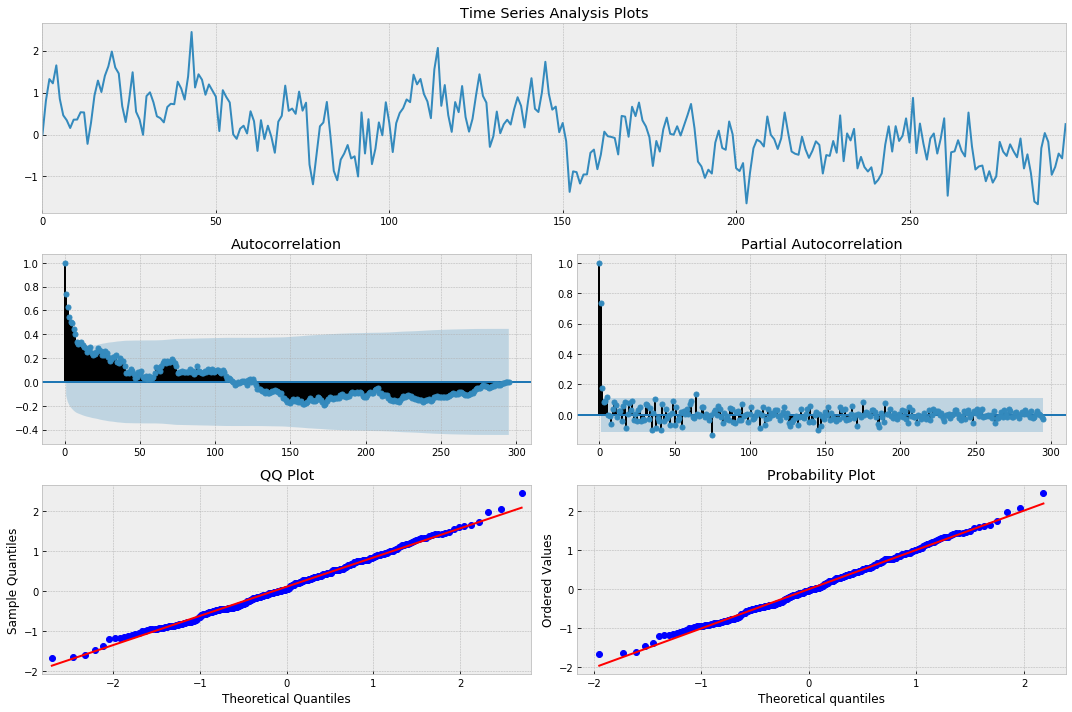

In [42]:
tsplot(df_train['X'][interval1])

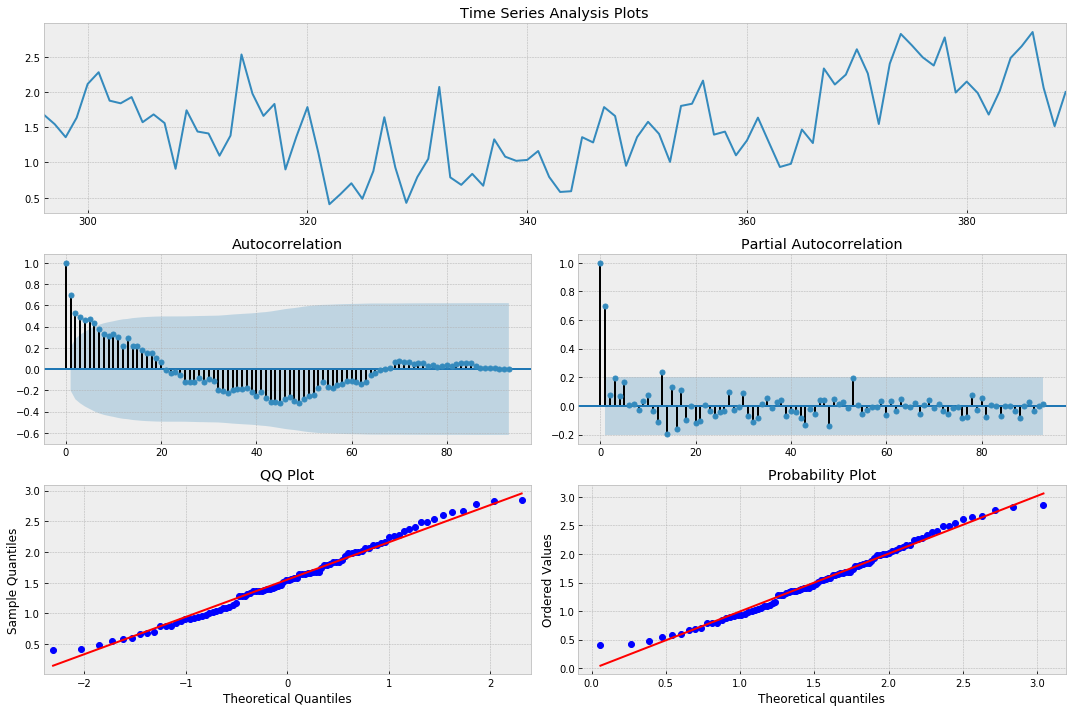

In [43]:
tsplot(df_train['X'][interval2])

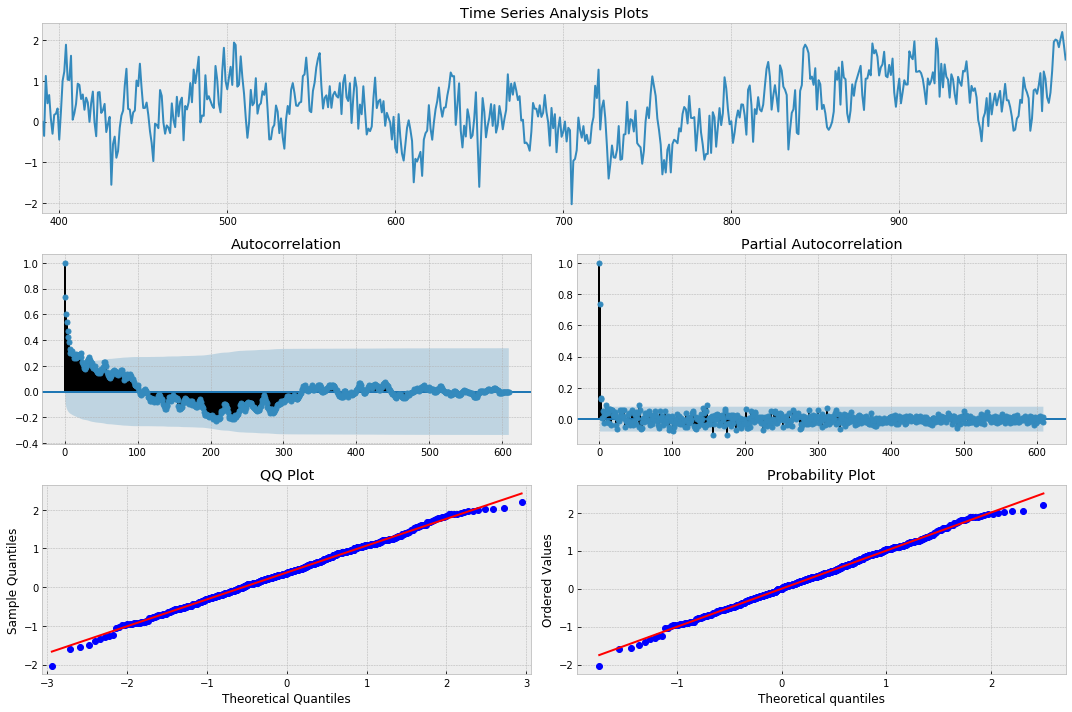

In [41]:
tsplot(df_train['X'][interval3])

a)       
$X_{\infty}$ = Белый шум

$X_{0}$  =  AR(1)

б) Посчитаем статистики $R_n$, используя предположения о распределении в пункте а